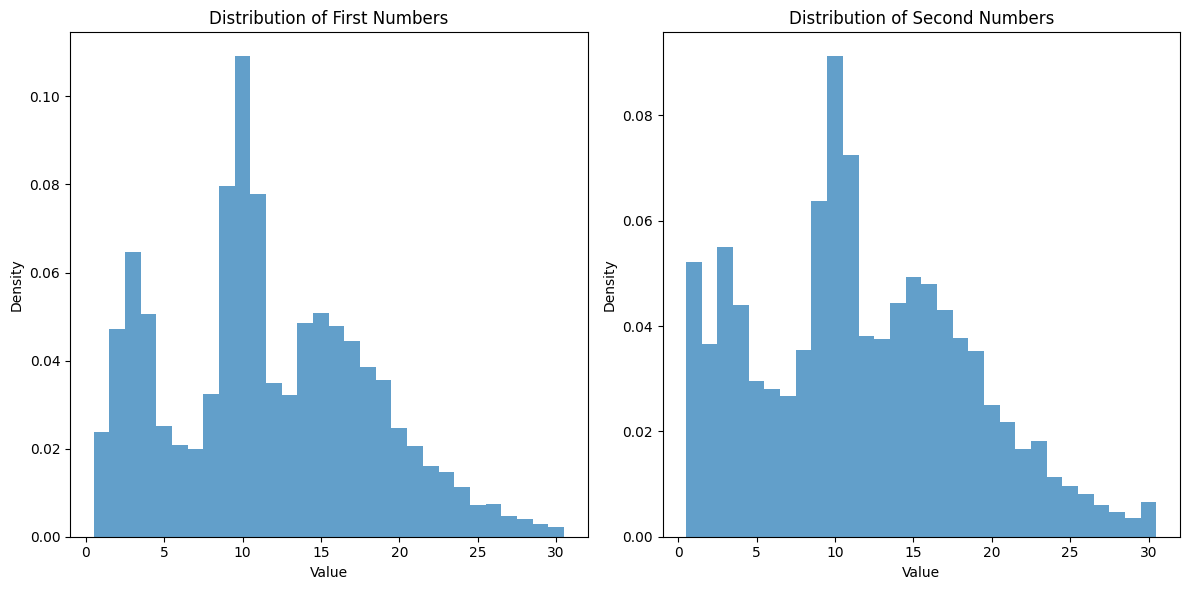

Sample number pairs (first, second):
(8, 8)
(8, 8)
(8, 15)
(29, 26)
(9, 6)
(11, 12)
(16, 16)
(20, 20)
(16, 16)
(2, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the two normal distributions
mean1, std1, size1 = 3, 1, 10000  # Peak at 3
mean2, std2, size2 = 10, 0.8, 15000  # Peak at 10

# Generating the two normal distributions
data1 = np.random.normal(mean1, std1, size1)
data2 = np.random.normal(mean2, std2, size2)

# Parameters for the uniform distribution (for the valley)
valley_size = int((size1 + size2) * 0.1)  # 10% of the total peak size
data_valley = np.random.uniform(5, 8, valley_size)

# Parameters for the gamma distribution (for the long tail)
shape, scale = 2, 3
size3 = 20000
data3 = np.random.gamma(shape, scale, size3) + 12  # Shifting the gamma distribution

# Combining the data
combined_data = np.concatenate([data1, data2, data_valley, data3])

# Trimming the data to fit within the desired range (0 to 30)
combined_data = combined_data[(combined_data >= 0) & (combined_data <= 30)]

# Create a kernel density estimate
kde = stats.gaussian_kde(combined_data)

def generate_two_numbers():
    # Generate the first number from our distribution
    first_number = int(np.round(kde.resample(1)[0][0]))
    
    # Ensure the first number is between 1 and 30
    first_number = max(1, min(30, first_number))
    
    # Generate the second number
    if np.random.random() < 2/3:
        # 2/3 of the time, use the same number
        second_number = first_number
    else:
        # 1/3 of the time, add/subtract a scaled value from a normal distribution
        delta = int(np.round(np.random.normal(0, 1) * 5))  # Scale by 5 to get a range of roughly -10 to 10
        second_number = first_number + delta
    
    # Ensure the second number is also between 1 and 30
    second_number = max(1, min(30, second_number))
    return first_number, second_number  

# Generate a sample of number pairs
sample_size = 10000
samples = [generate_two_numbers() for _ in range(sample_size)]

# Separate the samples into first and second numbers
first_numbers, second_numbers = zip(*samples)

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(first_numbers, bins=30, range=(0.5, 30.5), density=True, alpha=0.7)
plt.title('Distribution of First Numbers')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(second_numbers, bins=30, range=(0.5, 30.5), density=True, alpha=0.7)
plt.title('Distribution of Second Numbers')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Print some sample pairs
print("Sample number pairs (first, second):")
for _ in range(10):
    print(generate_two_numbers())